In [ ]:
import requests
import zipfile
import os

# URL of the dataset
url = 'https://www.dropbox.com/scl/fi/u2w4eoeiksyae1pn0di6d/IndianSignLanguage.zip?rlkey=38ztp9zkqvhdvusoeet3a9qex&dl=1'  # Set dl=1 to download directly

# Download the file
response = requests.get(url)
zip_path = 'IndianSignLanguage.zip'

# Save the ZIP file
with open(zip_path, 'wb') as f:
    f.write(response.content)

print("Dataset downloaded successfully.")

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('IndianSignLanguage')

print("Dataset extracted successfully.")


Dataset downloaded successfully.
Dataset extracted successfully.


Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        4       1200
1        7       1200
2        E       1200
3        M       1200
4        2       1200
5        H       1200
6        C       1200
7        P       1200
8        V       1200
9        U       1200
10       Y       1200
11       9       1200
12       1       1200
13       I       1200
14       K       1200
15       B       1200
16       D       1200
17       J       1200
18       Q       1200
19       N       1200
20       X       1200
21       Z       1200
22       3       1200
23       8       1200
24       F       1200
25       6       1200
26       W       1200
27       T       1200
28       A       1200
29       G       1200
30       R       1200
31       5       1200
32       O       1200
33       L       1200
34       S       1200



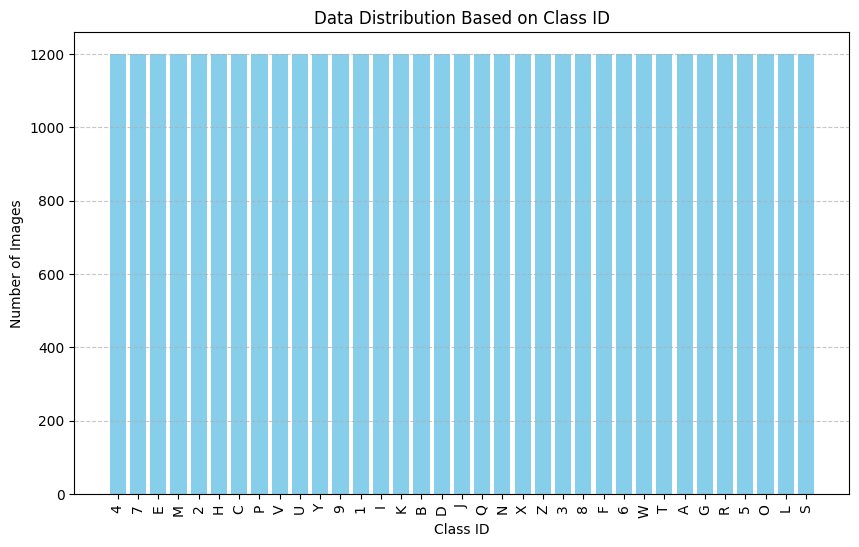

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to load the dataset and extract metadata
def extract_metadata(dataset_path):
    data = []
    class_distribution = {}

    # Loop through each class directory
    for class_dir in os.listdir(dataset_path):
        # Skip hidden files or directories (e.g., .DS_Store on macOS)
        if class_dir.startswith('.'):
            continue

        # Use the directory name as the class label (no conversion to int)
        class_id = class_dir
        class_images = os.listdir(os.path.join(dataset_path, class_dir))

        # Count the number of images in the class directory
        class_distribution[class_id] = len(class_images)
        data.append((class_id, len(class_images)))

    # Convert data to DataFrame for easier manipulation and visualization
    df = pd.DataFrame(data, columns=['ClassID', 'NumImages'])

    # Calculate total number of images
    total_images = df['NumImages'].sum()

    # Display metadata
    print("Metadata Summary:")
    print("=================")
    print("Total number of images:", total_images)
    print("Number of classes:", len(df))
    print("Class distribution:")
    print(df)
    print("")

    return df, class_distribution

# Path to the dataset
dataset_path = "IndianSignLanguage/data"

# Extract metadata
metadata_df, class_distribution = extract_metadata(dataset_path)

# Plot the data distribution based on class ID
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Data Distribution Based on Class ID')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many classes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Exploratory Analysis:
Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        4       1200
1        7       1200
2        E       1200
3        M       1200
4        2       1200
5        H       1200
6        C       1200
7        P       1200
8        V       1200
9        U       1200
10       Y       1200
11       9       1200
12       1       1200
13       I       1200
14       K       1200
15       B       1200
16       D       1200
17       J       1200
18       Q       1200
19       N       1200
20       X       1200
21       Z       1200
22       3       1200
23       8       1200
24       F       1200
25       6       1200
26       W       1200
27       T       1200
28       A       1200
29       G       1200
30       R       1200
31       5       1200
32       O       1200
33       L       1200
34       S       1200



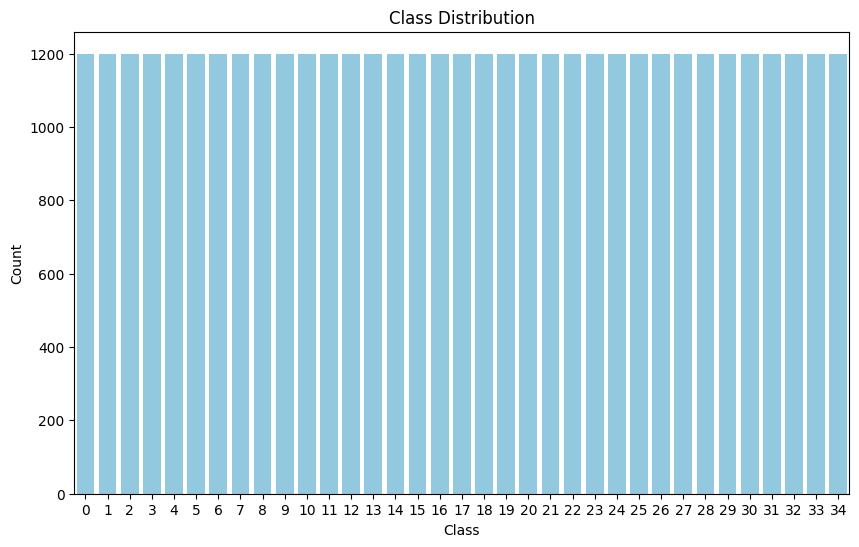

In [ ]:
import os
import shutil
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# Define paths
source_dir = "IndianSignLanguage/data"
target_dir = "IndianSignLanguage_processed"

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Define classes to keep (adjust as needed for your dataset)
# Here, classes can be set as specific folder names you want to keep.
classes_to_keep = os.listdir(source_dir)  # Keeps all classes in the dataset

# Copy images of selected classes to the target directory
for class_name in classes_to_keep:
    src_path = os.path.join(source_dir, class_name)
    dst_path = os.path.join(target_dir, class_name)
    try:
        shutil.copytree(src_path, dst_path)
    except FileExistsError:
        print(f"Directory '{dst_path}' already exists. Skipping copying.")

# Dataset Paths
data_dir = target_dir

# Extract metadata
# Exploratory Analysis
print("Exploratory Analysis:")
metadata_df, class_distribution = extract_metadata(data_dir)

# Image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset with augmented transform
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Convert to DataFrame
df = pd.DataFrame(dataset.imgs, columns=['image_path', 'label'])

# Distribution Graphs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


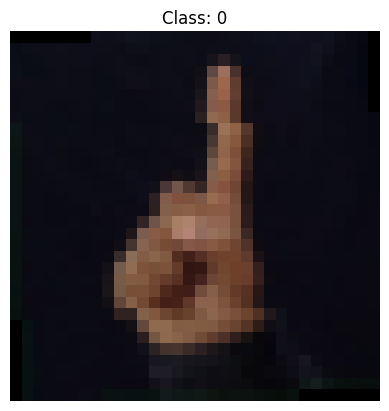

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(10),  # Random rotation within ±10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset (make sure to replace 'data_dir' with your actual dataset path)
data_dir = 'IndianSignLanguage_processed'  # Replace with your dataset path
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Select a random image from the dataset
img, label = dataset[2]  # Get the first image and its label

# Convert tensor to numpy for visualization
img = img.numpy().transpose((1, 2, 0))  # Convert to HWC format
img = img * 0.5 + 0.5  # Undo the normalization (mean=0.5, std=0.5)

# Plot the image
plt.imshow(img)
plt.title(f'Class: {label}')
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Define function to train and evaluate the model
def train_eval_model(model, train_loader, val_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    model.eval()
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            true_labels.extend(labels.numpy())
            pred_labels.extend(predicted.numpy())

    precision_val = precision_score(true_labels, pred_labels, average='weighted')
    recall_val = recall_score(true_labels, pred_labels, average='weighted')
    f1_val = f1_score(true_labels, pred_labels, average='weighted')
    acc = accuracy_score(true_labels, pred_labels)

    return epoch_loss, acc, f1_val, recall_val, precision_val

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_acc = 100. * correct / total

    return train_loss, train_acc, test_loss, test_acc

In [ ]:
from sklearn.model_selection import ParameterGrid
# Define hyperparameters
hyperparameters = {
    'lr': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

# Initialize lists to store evaluation metrics
# 1: gtsrb dataset, 2:chinese, 3:roadsign

accuracy_arr = {1: [], 2: [], 3: []}
f1_arr = {1: [], 2: [], 3: []}
recall_arr = {1: [], 2: [], 3: []}
precision_arr = {1: [], 2: [], 3: []}

num_epochs = 10  # You can adjust this as needed

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
import shutil
import seaborn as sns
import bs4
import warnings
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.exceptions import UndefinedMetricWarning
# Suppress the warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [ ]:
# Define dataset paths
data_dir = "IndianSignLanguage_processed"

# Image transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(10),  # Random rotation within ±10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])



# Define the LeNet5 model
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Perform grid search
for params in tqdm(ParameterGrid(hyperparameters)):
    # Initialize the model
    model = LeNet5(num_classes=35).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=params['lr'])

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    val_loader = DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)

    # Training and evaluation loop
    for epoch in range(num_epochs):
        train_loss, acc, f1_val, recall_val, precision_val = train_eval_model(model, train_loader, val_loader, criterion, optimizer, device)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Accuracy: {acc:.4f}, F1 Score: {f1_val:.4f}, Recall: {recall_val:.4f}, Precision: {precision_val:.4f}")

    # Save metrics
    accuracy_arr[1].append(acc)
    f1_arr[1].append(f1_val)
    recall_arr[1].append(recall_val)
    precision_arr[1].append(precision_val)

print("Accuracy:", accuracy_arr[1])
print("F1 Score:", f1_arr[1])
print("Recall:", recall_arr[1])
print("Precision:", precision_arr[1])

# Find the index of the best accuracy
best_index = accuracy_arr[1].index(max(accuracy_arr[1]))

# Retrieve the best hyperparameters
best_hyperparameters = ParameterGrid(hyperparameters)[best_index]

# Print the best hyperparameters and the corresponding best accuracy
print("Best hyperparameters:", best_hyperparameters)
print("Best accuracy:", accuracy_arr[1][best_index])


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [1/10], Train Loss: 3.5479, Accuracy: 0.0582, F1 Score: 0.0131, Recall: 0.0582, Precision: 0.0078
Epoch [2/10], Train Loss: 3.4237, Accuracy: 0.1116, F1 Score: 0.0445, Recall: 0.1116, Precision: 0.0847
Epoch [3/10], Train Loss: 2.8373, Accuracy: 0.3262, F1 Score: 0.2585, Recall: 0.3262, Precision: 0.3413
Epoch [4/10], Train Loss: 2.1338, Accuracy: 0.5547, F1 Score: 0.5246, Recall: 0.5547, Precision: 0.5949
Epoch [5/10], Train Loss: 1.6278, Accuracy: 0.6959, F1 Score: 0.6764, Recall: 0.6959, Precision: 0.7073
Epoch [6/10], Train Loss: 1.2837, Accuracy: 0.7383, F1 Score: 0.7252, Recall: 0.7383, Precision: 0.7499
Epoch [7/10], Train Loss: 1.0454, Accuracy: 0.8011, F1 Score: 0.7945, Recall: 0.8011, Precision: 0.8133
Epoch [8/10], Train Loss: 0.8638, Accuracy: 0.8310, F1 Score: 0.8264, Recall: 0.8310, Precision: 0.8450
Epoch [9/10], Train Loss: 0.7280, Accuracy: 0.8745, F1 Score: 0.8760, Recall: 0.8745, Precision: 0.8816


  7%|▋         | 1/15 [10:23<2:25:34, 623.90s/it]

Epoch [10/10], Train Loss: 0.6138, Accuracy: 0.8983, F1 Score: 0.8983, Recall: 0.8983, Precision: 0.9014
Epoch [1/10], Train Loss: 1.5965, Accuracy: 0.8842, F1 Score: 0.8746, Recall: 0.8842, Precision: 0.8876
Epoch [2/10], Train Loss: 0.2500, Accuracy: 0.9640, F1 Score: 0.9640, Recall: 0.9640, Precision: 0.9657
Epoch [3/10], Train Loss: 0.1178, Accuracy: 0.9793, F1 Score: 0.9793, Recall: 0.9793, Precision: 0.9798
Epoch [4/10], Train Loss: 0.0776, Accuracy: 0.9797, F1 Score: 0.9797, Recall: 0.9797, Precision: 0.9814
Epoch [5/10], Train Loss: 0.0544, Accuracy: 0.9885, F1 Score: 0.9885, Recall: 0.9885, Precision: 0.9889
Epoch [6/10], Train Loss: 0.0405, Accuracy: 0.9918, F1 Score: 0.9918, Recall: 0.9918, Precision: 0.9919
Epoch [7/10], Train Loss: 0.0348, Accuracy: 0.9875, F1 Score: 0.9874, Recall: 0.9875, Precision: 0.9883
Epoch [8/10], Train Loss: 0.0324, Accuracy: 0.9894, F1 Score: 0.9893, Recall: 0.9894, Precision: 0.9899
Epoch [9/10], Train Loss: 0.0222, Accuracy: 0.9958, F1 Score: 0

 13%|█▎        | 2/15 [20:47<2:15:07, 623.65s/it]

Epoch [10/10], Train Loss: 0.0220, Accuracy: 0.9956, F1 Score: 0.9956, Recall: 0.9956, Precision: 0.9957
Epoch [1/10], Train Loss: 0.5330, Accuracy: 0.9883, F1 Score: 0.9884, Recall: 0.9883, Precision: 0.9889
Epoch [2/10], Train Loss: 0.0544, Accuracy: 0.9967, F1 Score: 0.9967, Recall: 0.9967, Precision: 0.9967
Epoch [3/10], Train Loss: 0.0242, Accuracy: 0.9866, F1 Score: 0.9865, Recall: 0.9866, Precision: 0.9874
Epoch [4/10], Train Loss: 0.0260, Accuracy: 0.9977, F1 Score: 0.9977, Recall: 0.9977, Precision: 0.9978
Epoch [5/10], Train Loss: 0.0070, Accuracy: 0.9997, F1 Score: 0.9997, Recall: 0.9997, Precision: 0.9997
Epoch [6/10], Train Loss: 0.0186, Accuracy: 0.9984, F1 Score: 0.9984, Recall: 0.9984, Precision: 0.9984
Epoch [7/10], Train Loss: 0.0074, Accuracy: 0.9998, F1 Score: 0.9998, Recall: 0.9998, Precision: 0.9998
Epoch [8/10], Train Loss: 0.0144, Accuracy: 0.9983, F1 Score: 0.9983, Recall: 0.9983, Precision: 0.9983
Epoch [9/10], Train Loss: 0.0020, Accuracy: 0.9998, F1 Score: 0

 20%|██        | 3/15 [31:16<2:05:11, 625.99s/it]

Epoch [10/10], Train Loss: 0.0036, Accuracy: 0.9752, F1 Score: 0.9748, Recall: 0.9752, Precision: 0.9783
Epoch [1/10], Train Loss: 0.5081, Accuracy: 0.9522, F1 Score: 0.9524, Recall: 0.9522, Precision: 0.9588
Epoch [2/10], Train Loss: 0.1326, Accuracy: 0.9762, F1 Score: 0.9761, Recall: 0.9762, Precision: 0.9781
Epoch [3/10], Train Loss: 0.1312, Accuracy: 0.9365, F1 Score: 0.9373, Recall: 0.9365, Precision: 0.9466
Epoch [4/10], Train Loss: 0.0957, Accuracy: 0.9886, F1 Score: 0.9886, Recall: 0.9886, Precision: 0.9890
Epoch [5/10], Train Loss: 0.1453, Accuracy: 0.9525, F1 Score: 0.9517, Recall: 0.9525, Precision: 0.9595
Epoch [6/10], Train Loss: 0.1517, Accuracy: 0.9863, F1 Score: 0.9862, Recall: 0.9863, Precision: 0.9865
Epoch [7/10], Train Loss: 0.0911, Accuracy: 0.9949, F1 Score: 0.9949, Recall: 0.9949, Precision: 0.9950
Epoch [8/10], Train Loss: 0.1630, Accuracy: 0.9706, F1 Score: 0.9705, Recall: 0.9706, Precision: 0.9725
Epoch [9/10], Train Loss: 0.0950, Accuracy: 0.9894, F1 Score: 0

 27%|██▋       | 4/15 [41:44<1:54:55, 626.84s/it]

Epoch [10/10], Train Loss: 0.1243, Accuracy: 0.9535, F1 Score: 0.9541, Recall: 0.9535, Precision: 0.9592
Epoch [1/10], Train Loss: 4.6240, Accuracy: 0.0267, F1 Score: 0.0014, Recall: 0.0267, Precision: 0.0007
Epoch [2/10], Train Loss: 3.5815, Accuracy: 0.0294, F1 Score: 0.0017, Recall: 0.0294, Precision: 0.0009
Epoch [3/10], Train Loss: 3.5799, Accuracy: 0.0275, F1 Score: 0.0015, Recall: 0.0275, Precision: 0.0008
Epoch [4/10], Train Loss: 3.5811, Accuracy: 0.0293, F1 Score: 0.0017, Recall: 0.0293, Precision: 0.0009
Epoch [5/10], Train Loss: 3.5812, Accuracy: 0.0310, F1 Score: 0.0019, Recall: 0.0310, Precision: 0.0010
Epoch [6/10], Train Loss: 3.5809, Accuracy: 0.0275, F1 Score: 0.0015, Recall: 0.0275, Precision: 0.0008
Epoch [7/10], Train Loss: 3.5812, Accuracy: 0.0292, F1 Score: 0.0017, Recall: 0.0292, Precision: 0.0009
Epoch [8/10], Train Loss: 3.5816, Accuracy: 0.0294, F1 Score: 0.0017, Recall: 0.0294, Precision: 0.0009
Epoch [9/10], Train Loss: 3.5805, Accuracy: 0.0286, F1 Score: 0

 33%|███▎      | 5/15 [52:11<1:44:28, 626.82s/it]

Epoch [10/10], Train Loss: 3.5799, Accuracy: 0.0264, F1 Score: 0.0014, Recall: 0.0264, Precision: 0.0007
Epoch [1/10], Train Loss: 3.5541, Accuracy: 0.0298, F1 Score: 0.0025, Recall: 0.0298, Precision: 0.0014
Epoch [2/10], Train Loss: 3.5237, Accuracy: 0.1074, F1 Score: 0.0556, Recall: 0.1074, Precision: 0.0792
Epoch [3/10], Train Loss: 3.3334, Accuracy: 0.1156, F1 Score: 0.0651, Recall: 0.1156, Precision: 0.0620
Epoch [4/10], Train Loss: 2.9250, Accuracy: 0.2418, F1 Score: 0.1605, Recall: 0.2418, Precision: 0.2669
Epoch [5/10], Train Loss: 2.4409, Accuracy: 0.4364, F1 Score: 0.3813, Recall: 0.4364, Precision: 0.4356
Epoch [6/10], Train Loss: 1.9675, Accuracy: 0.5506, F1 Score: 0.5039, Recall: 0.5506, Precision: 0.5519
Epoch [7/10], Train Loss: 1.6110, Accuracy: 0.6290, F1 Score: 0.5845, Recall: 0.6290, Precision: 0.6108
Epoch [8/10], Train Loss: 1.3521, Accuracy: 0.6968, F1 Score: 0.6665, Recall: 0.6968, Precision: 0.6979
Epoch [9/10], Train Loss: 1.1596, Accuracy: 0.7496, F1 Score: 0

 40%|████      | 6/15 [1:02:11<1:32:40, 617.85s/it]

Epoch [10/10], Train Loss: 1.0108, Accuracy: 0.7983, F1 Score: 0.7912, Recall: 0.7983, Precision: 0.8071
Epoch [1/10], Train Loss: 2.3652, Accuracy: 0.6987, F1 Score: 0.6653, Recall: 0.6987, Precision: 0.7580
Epoch [2/10], Train Loss: 0.6199, Accuracy: 0.8910, F1 Score: 0.8826, Recall: 0.8910, Precision: 0.8870
Epoch [3/10], Train Loss: 0.2809, Accuracy: 0.9480, F1 Score: 0.9479, Recall: 0.9480, Precision: 0.9517
Epoch [4/10], Train Loss: 0.1655, Accuracy: 0.9583, F1 Score: 0.9582, Recall: 0.9583, Precision: 0.9610
Epoch [5/10], Train Loss: 0.1123, Accuracy: 0.9792, F1 Score: 0.9793, Recall: 0.9792, Precision: 0.9798
Epoch [6/10], Train Loss: 0.0771, Accuracy: 0.9825, F1 Score: 0.9825, Recall: 0.9825, Precision: 0.9835
Epoch [7/10], Train Loss: 0.0634, Accuracy: 0.9837, F1 Score: 0.9838, Recall: 0.9837, Precision: 0.9843
Epoch [8/10], Train Loss: 0.0492, Accuracy: 0.9860, F1 Score: 0.9860, Recall: 0.9860, Precision: 0.9868
Epoch [9/10], Train Loss: 0.0412, Accuracy: 0.9862, F1 Score: 0

 47%|████▋     | 7/15 [1:12:12<1:21:39, 612.39s/it]

Epoch [10/10], Train Loss: 0.0371, Accuracy: 0.9905, F1 Score: 0.9905, Recall: 0.9905, Precision: 0.9910
Epoch [1/10], Train Loss: 0.7740, Accuracy: 0.9623, F1 Score: 0.9628, Recall: 0.9623, Precision: 0.9673
Epoch [2/10], Train Loss: 0.0653, Accuracy: 0.9773, F1 Score: 0.9770, Recall: 0.9773, Precision: 0.9802
Epoch [3/10], Train Loss: 0.0365, Accuracy: 0.9936, F1 Score: 0.9936, Recall: 0.9936, Precision: 0.9938
Epoch [4/10], Train Loss: 0.0229, Accuracy: 0.9980, F1 Score: 0.9980, Recall: 0.9980, Precision: 0.9980
Epoch [5/10], Train Loss: 0.0149, Accuracy: 0.9986, F1 Score: 0.9986, Recall: 0.9986, Precision: 0.9986
Epoch [6/10], Train Loss: 0.0118, Accuracy: 0.9994, F1 Score: 0.9994, Recall: 0.9994, Precision: 0.9994
Epoch [7/10], Train Loss: 0.0122, Accuracy: 0.9964, F1 Score: 0.9964, Recall: 0.9964, Precision: 0.9965
Epoch [8/10], Train Loss: 0.0107, Accuracy: 0.9976, F1 Score: 0.9976, Recall: 0.9976, Precision: 0.9977
Epoch [9/10], Train Loss: 0.0102, Accuracy: 0.9967, F1 Score: 0

 53%|█████▎    | 8/15 [1:22:16<1:11:07, 609.70s/it]

Epoch [10/10], Train Loss: 0.0058, Accuracy: 0.9806, F1 Score: 0.9807, Recall: 0.9806, Precision: 0.9837
Epoch [1/10], Train Loss: 0.4447, Accuracy: 0.9753, F1 Score: 0.9752, Recall: 0.9753, Precision: 0.9772
Epoch [2/10], Train Loss: 0.0942, Accuracy: 0.9867, F1 Score: 0.9868, Recall: 0.9867, Precision: 0.9877
Epoch [3/10], Train Loss: 0.0732, Accuracy: 0.9859, F1 Score: 0.9858, Recall: 0.9859, Precision: 0.9866
Epoch [4/10], Train Loss: 0.0411, Accuracy: 0.9334, F1 Score: 0.9308, Recall: 0.9334, Precision: 0.9412
Epoch [5/10], Train Loss: 0.1048, Accuracy: 0.9869, F1 Score: 0.9869, Recall: 0.9869, Precision: 0.9874
Epoch [6/10], Train Loss: 0.0818, Accuracy: 0.9762, F1 Score: 0.9760, Recall: 0.9762, Precision: 0.9790
Epoch [7/10], Train Loss: 0.0475, Accuracy: 0.9944, F1 Score: 0.9944, Recall: 0.9944, Precision: 0.9946
Epoch [8/10], Train Loss: 0.1475, Accuracy: 0.9806, F1 Score: 0.9805, Recall: 0.9806, Precision: 0.9815
Epoch [9/10], Train Loss: 0.0713, Accuracy: 0.9958, F1 Score: 0

 60%|██████    | 9/15 [1:32:13<1:00:34, 605.83s/it]

Epoch [10/10], Train Loss: 0.0607, Accuracy: 0.9925, F1 Score: 0.9924, Recall: 0.9925, Precision: 0.9926
Epoch [1/10], Train Loss: 8.8700, Accuracy: 0.0290, F1 Score: 0.0016, Recall: 0.0290, Precision: 0.0008
Epoch [2/10], Train Loss: 3.5728, Accuracy: 0.0290, F1 Score: 0.0016, Recall: 0.0290, Precision: 0.0008
Epoch [3/10], Train Loss: 3.5737, Accuracy: 0.0290, F1 Score: 0.0016, Recall: 0.0290, Precision: 0.0008
Epoch [4/10], Train Loss: 3.5742, Accuracy: 0.0294, F1 Score: 0.0017, Recall: 0.0294, Precision: 0.0009
Epoch [5/10], Train Loss: 3.5734, Accuracy: 0.0290, F1 Score: 0.0016, Recall: 0.0290, Precision: 0.0008
Epoch [6/10], Train Loss: 3.5733, Accuracy: 0.0302, F1 Score: 0.0018, Recall: 0.0302, Precision: 0.0009
Epoch [7/10], Train Loss: 3.5731, Accuracy: 0.0286, F1 Score: 0.0016, Recall: 0.0286, Precision: 0.0008
Epoch [8/10], Train Loss: 3.5738, Accuracy: 0.0286, F1 Score: 0.0016, Recall: 0.0286, Precision: 0.0008
Epoch [9/10], Train Loss: 3.5727, Accuracy: 0.0258, F1 Score: 0

 67%|██████▋   | 10/15 [1:42:11<50:16, 603.32s/it] 

Epoch [10/10], Train Loss: 3.5723, Accuracy: 0.0280, F1 Score: 0.0015, Recall: 0.0280, Precision: 0.0008
Epoch [1/10], Train Loss: 3.5547, Accuracy: 0.0570, F1 Score: 0.0299, Recall: 0.0570, Precision: 0.0348
Epoch [2/10], Train Loss: 3.5459, Accuracy: 0.0504, F1 Score: 0.0265, Recall: 0.0504, Precision: 0.0410
Epoch [3/10], Train Loss: 3.5241, Accuracy: 0.0559, F1 Score: 0.0269, Recall: 0.0559, Precision: 0.0472
Epoch [4/10], Train Loss: 3.4685, Accuracy: 0.0610, F1 Score: 0.0145, Recall: 0.0610, Precision: 0.0508
Epoch [5/10], Train Loss: 3.3499, Accuracy: 0.0770, F1 Score: 0.0291, Recall: 0.0770, Precision: 0.0856
Epoch [6/10], Train Loss: 3.1540, Accuracy: 0.1693, F1 Score: 0.0941, Recall: 0.1693, Precision: 0.0829
Epoch [7/10], Train Loss: 2.9076, Accuracy: 0.2313, F1 Score: 0.1374, Recall: 0.2313, Precision: 0.1232
Epoch [8/10], Train Loss: 2.6421, Accuracy: 0.3158, F1 Score: 0.2110, Recall: 0.3158, Precision: 0.2598
Epoch [9/10], Train Loss: 2.3664, Accuracy: 0.4066, F1 Score: 0

 73%|███████▎  | 11/15 [1:52:05<40:01, 600.40s/it]

Epoch [10/10], Train Loss: 2.0958, Accuracy: 0.5174, F1 Score: 0.4733, Recall: 0.5174, Precision: 0.5994
Epoch [1/10], Train Loss: 3.0109, Accuracy: 0.5403, F1 Score: 0.4734, Recall: 0.5403, Precision: 0.5686
Epoch [2/10], Train Loss: 1.1515, Accuracy: 0.8683, F1 Score: 0.8639, Recall: 0.8683, Precision: 0.8848
Epoch [3/10], Train Loss: 0.5398, Accuracy: 0.9319, F1 Score: 0.9315, Recall: 0.9319, Precision: 0.9352
Epoch [4/10], Train Loss: 0.3116, Accuracy: 0.9510, F1 Score: 0.9510, Recall: 0.9510, Precision: 0.9535
Epoch [5/10], Train Loss: 0.2017, Accuracy: 0.9587, F1 Score: 0.9586, Recall: 0.9587, Precision: 0.9621
Epoch [6/10], Train Loss: 0.1454, Accuracy: 0.9701, F1 Score: 0.9701, Recall: 0.9701, Precision: 0.9711
Epoch [7/10], Train Loss: 0.1065, Accuracy: 0.9754, F1 Score: 0.9754, Recall: 0.9754, Precision: 0.9760
Epoch [8/10], Train Loss: 0.0869, Accuracy: 0.9839, F1 Score: 0.9838, Recall: 0.9839, Precision: 0.9841
Epoch [9/10], Train Loss: 0.0691, Accuracy: 0.9855, F1 Score: 0

 80%|████████  | 12/15 [2:01:58<29:54, 598.27s/it]

Epoch [10/10], Train Loss: 0.0569, Accuracy: 0.9884, F1 Score: 0.9884, Recall: 0.9884, Precision: 0.9886
Epoch [1/10], Train Loss: 1.1169, Accuracy: 0.9496, F1 Score: 0.9496, Recall: 0.9496, Precision: 0.9536
Epoch [2/10], Train Loss: 0.1058, Accuracy: 0.9806, F1 Score: 0.9809, Recall: 0.9806, Precision: 0.9836
Epoch [3/10], Train Loss: 0.0476, Accuracy: 0.9924, F1 Score: 0.9924, Recall: 0.9924, Precision: 0.9926
Epoch [4/10], Train Loss: 0.0334, Accuracy: 0.9881, F1 Score: 0.9880, Recall: 0.9881, Precision: 0.9895
Epoch [5/10], Train Loss: 0.0289, Accuracy: 0.9925, F1 Score: 0.9926, Recall: 0.9925, Precision: 0.9934
Epoch [6/10], Train Loss: 0.0233, Accuracy: 0.9976, F1 Score: 0.9976, Recall: 0.9976, Precision: 0.9977
Epoch [7/10], Train Loss: 0.0152, Accuracy: 0.9972, F1 Score: 0.9972, Recall: 0.9972, Precision: 0.9973
Epoch [8/10], Train Loss: 0.0082, Accuracy: 0.9937, F1 Score: 0.9938, Recall: 0.9937, Precision: 0.9945
Epoch [9/10], Train Loss: 0.0113, Accuracy: 0.9988, F1 Score: 0

 87%|████████▋ | 13/15 [2:11:50<19:52, 596.23s/it]

Epoch [10/10], Train Loss: 0.0124, Accuracy: 0.9884, F1 Score: 0.9881, Recall: 0.9884, Precision: 0.9895
Epoch [1/10], Train Loss: 0.7203, Accuracy: 0.9762, F1 Score: 0.9763, Recall: 0.9762, Precision: 0.9776
Epoch [2/10], Train Loss: 0.0681, Accuracy: 0.9894, F1 Score: 0.9894, Recall: 0.9894, Precision: 0.9901
Epoch [3/10], Train Loss: 0.0454, Accuracy: 0.9921, F1 Score: 0.9921, Recall: 0.9921, Precision: 0.9924
Epoch [4/10], Train Loss: 0.0547, Accuracy: 0.9927, F1 Score: 0.9927, Recall: 0.9927, Precision: 0.9931
Epoch [5/10], Train Loss: 0.0273, Accuracy: 0.9969, F1 Score: 0.9969, Recall: 0.9969, Precision: 0.9970
Epoch [6/10], Train Loss: 0.0538, Accuracy: 0.9629, F1 Score: 0.9626, Recall: 0.9629, Precision: 0.9670
Epoch [7/10], Train Loss: 0.0407, Accuracy: 0.9915, F1 Score: 0.9915, Recall: 0.9915, Precision: 0.9919
Epoch [8/10], Train Loss: 0.0753, Accuracy: 0.9806, F1 Score: 0.9806, Recall: 0.9806, Precision: 0.9818
Epoch [9/10], Train Loss: 0.0827, Accuracy: 0.9954, F1 Score: 0

 93%|█████████▎| 14/15 [2:21:37<09:53, 593.37s/it]

Epoch [10/10], Train Loss: 0.0301, Accuracy: 0.9951, F1 Score: 0.9951, Recall: 0.9951, Precision: 0.9952
Epoch [1/10], Train Loss: 3.0357, Accuracy: 0.3913, F1 Score: 0.3588, Recall: 0.3913, Precision: 0.3925
Epoch [2/10], Train Loss: 1.7983, Accuracy: 0.4275, F1 Score: 0.4104, Recall: 0.4275, Precision: 0.4690
Epoch [3/10], Train Loss: 1.8374, Accuracy: 0.4083, F1 Score: 0.3582, Recall: 0.4083, Precision: 0.4035
Epoch [4/10], Train Loss: 1.6309, Accuracy: 0.4647, F1 Score: 0.4233, Recall: 0.4647, Precision: 0.4322
Epoch [5/10], Train Loss: 1.6335, Accuracy: 0.4116, F1 Score: 0.3944, Recall: 0.4116, Precision: 0.4398
Epoch [6/10], Train Loss: 1.8852, Accuracy: 0.3814, F1 Score: 0.3543, Recall: 0.3814, Precision: 0.4277
Epoch [7/10], Train Loss: 1.7707, Accuracy: 0.3298, F1 Score: 0.2822, Recall: 0.3298, Precision: 0.3302
Epoch [8/10], Train Loss: 1.8967, Accuracy: 0.4463, F1 Score: 0.4005, Recall: 0.4463, Precision: 0.4465
Epoch [9/10], Train Loss: 1.5464, Accuracy: 0.5024, F1 Score: 0

100%|██████████| 15/15 [2:31:21<00:00, 605.44s/it]

Epoch [10/10], Train Loss: 1.4612, Accuracy: 0.4943, F1 Score: 0.4702, Recall: 0.4943, Precision: 0.5132
Accuracy: [0.8983414014760733, 0.9956352670422982, 0.9752400603126736, 0.9534957543052138, 0.026426474089357988, 0.7983493373541782, 0.9904769462741052, 0.9805570986429648, 0.9924609158003334, 0.028013649710340448, 0.5174192524402825, 0.988413617966828, 0.988413617966828, 0.9950797555749543, 0.4943258471549877]
F1 Score: [0.8982738158471751, 0.9956343667744921, 0.9748414655773069, 0.9541170111102897, 0.0013607570545471175, 0.7912400491375534, 0.9905358904895967, 0.980741149194531, 0.9924472603803922, 0.0015267590470511316, 0.4733320717680091, 0.9884439504885606, 0.9881056210667134, 0.9950770674236947, 0.47017704441596475]
Recall: [0.8983414014760733, 0.9956352670422982, 0.9752400603126736, 0.9534957543052138, 0.026426474089357988, 0.7983493373541782, 0.9904769462741052, 0.9805570986429648, 0.9924609158003334, 0.028013649710340448, 0.5174192524402825, 0.988413617966828, 0.98841361796